<a href="https://colab.research.google.com/github/mahadi0007/Sentinemnt-Analysis-MiniProject/blob/main/SentimentAnalysis(mini_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')
root_path = '/content/drive/My Drive/Datasets/'

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(root_path + 'Final Version Dataset - finalDataset.csv', skiprows=14)
df = df[['post', 'category']].dropna()
df

,post,category
0,"তবুও আমার দুটি চোখ, অচিন কোন মায়াময়\r\nনির্ব...",sad
1,আমার আজকের মুড ।\r\n\r\nপ্রেম 94%\r\nআবেগ 87%\...,neutral
2,Replying to \r\n@BDCricTimeমোসাদ্দেক বেস্ট,happy
3,Replying to \r\n @athaJDLlZgu9lQhঅসাধারণ পোস্ট,happy
4,"তুমি সাধারণ থেকো, কখনো নিজেকে অসাধারণ ভেবো না,...",neutral
...,...,...
10397,মুসফিক খেলাটি ফিরিয়ে আনলেও মাহমুদুল্লাও খেলাটি...,sad
10398,টাইটানিক জাহাজ ডুবে গেছে আর বাংলাদেশ ও ডুবে য...,sad
10399,বাংলাদেশ আগে ব্যাট না করাই ভুল করল।,sad
10400,আমার মনে হয় বাংলাদেশ আজ বাঁশ খেয়েছে ।,sad


In [ ]:
# One-hot encode labels
encoder = OneHotEncoder(handle_unknown='ignore')
labels_encoded = encoder.fit_transform(df[['category']])

In [ ]:
labels_encoded_array = labels_encoded.toarray()
encoded_df = pd.DataFrame(labels_encoded_array, columns=encoder.get_feature_names_out(['category']))
result_df = pd.concat([df, encoded_df], axis=1)
result_df = result_df.dropna()
result_df


,post,category,category_angry,category_happy,category_neutral,category_sad
0,"তবুও আমার দুটি চোখ, অচিন কোন মায়াময়\r\nনির্ব...",sad,0.0,0.0,0.0,1.0
1,আমার আজকের মুড ।\r\n\r\nপ্রেম 94%\r\nআবেগ 87%\...,neutral,0.0,0.0,1.0,0.0
2,Replying to \r\n@BDCricTimeমোসাদ্দেক বেস্ট,happy,0.0,1.0,0.0,0.0
3,Replying to \r\n @athaJDLlZgu9lQhঅসাধারণ পোস্ট,happy,0.0,1.0,0.0,0.0
4,"তুমি সাধারণ থেকো, কখনো নিজেকে অসাধারণ ভেবো না,...",neutral,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
10396,আজ মুশফিকখুর আর মাহামুদুলা বাংলা দেশের যেই শরব...,sad,0.0,0.0,0.0,1.0
10397,মুসফিক খেলাটি ফিরিয়ে আনলেও মাহমুদুল্লাও খেলাটি...,sad,0.0,0.0,0.0,1.0
10398,টাইটানিক জাহাজ ডুবে গেছে আর বাংলাদেশ ও ডুবে য...,sad,0.0,0.0,0.0,1.0
10399,বাংলাদেশ আগে ব্যাট না করাই ভুল করল।,sad,0.0,0.0,0.0,1.0


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['post'], labels_encoded, test_size=0.2, random_state=42)

In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
# Tokenize
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors='tf')

In [ ]:
# Convert labels to dense arrays before converting to tensors
y_train_tensor = tf.convert_to_tensor(y_train.toarray())
y_test_tensor = tf.convert_to_tensor(y_test.toarray())

In [ ]:
# Load BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=4)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train
history = model.fit(
    x=train_encodings.data,
    y=y_train_tensor,
    validation_data=(test_encodings.data, y_test_tensor),
    epochs=5,
    batch_size=16
)

Epoch 1/5
520/520 [==============================] - 275s 450ms/step - loss: 0.9153 - accuracy: 0.5930 - val_loss: 0.7901 - val_accuracy: 0.6877
Epoch 2/5
520/520 [==============================] - 230s 443ms/step - loss: 0.7068 - accuracy: 0.7131 - val_loss: 0.7516 - val_accuracy: 0.7069
Epoch 3/5
520/520 [==============================] - 230s 442ms/step - loss: 0.5899 - accuracy: 0.7738 - val_loss: 0.7314 - val_accuracy: 0.7064
Epoch 4/5
520/520 [==============================] - 230s 442ms/step - loss: 0.4551 - accuracy: 0.8309 - val_loss: 0.9043 - val_accuracy: 0.6925
Epoch 5/5
520/520 [==============================] - 230s 443ms/step - loss: 0.3506 - accuracy: 0.8743 - val_loss: 0.9660 - val_accuracy: 0.6891


In [ ]:
# Predict
y_pred_logits = model.predict(test_encodings.data).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()
y_true = tf.argmax(y_test_tensor, axis=1).numpy()

# Evaluation
print(classification_report(y_true, y_pred, target_names=encoder.categories_[0]))

66/66 [==============================] - 22s 269ms/step
              precision    recall  f1-score   support

       angry       0.69      0.84      0.76       699
       happy       0.70      0.76      0.73       658
     neutral       0.26      0.21      0.23        53
         sad       0.70      0.50      0.58       671

    accuracy                           0.69      2081
   macro avg       0.59      0.58      0.58      2081
weighted avg       0.69      0.69      0.68      2081



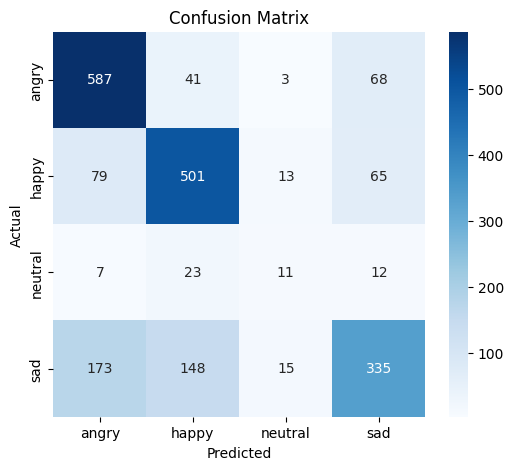

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0], cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle

# Save the model to a pickle file
with open('/content/drive/My Drive/Datasets/my_model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [ ]:

model.save_weights('/content/drive/My Drive/Datasets/my_model_weights.h5')


In [ ]:
# Save the encoder to a pickle file
with open('/content/drive/My Drive/Datasets/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [ ]:


import tensorflow as tf
from transformers import BertTokenizer
import numpy as np

# Load the saved model weights
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=4)
model.load_weights('/content/drive/My Drive/Datasets/my_model_weights.h5')



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def predict_category(text):
    # Tokenize the input text
    inputs = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors='tf')

    # Make predictions
    logits = model.predict(inputs).logits
    predicted_class = tf.argmax(logits, axis=1).numpy()[0]

    return predicted_class


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
# Example usage
input_text = "যে কোন ভাবে বিদেশে যেতে পারলেই হল! আমি বাংলাদেশে ব্যাংকে চাকরি করি - কিন্তু না, আমি কানাডা যেয়ে উবার চালিয়ে বাকি জীবন কাটাবো। এই ফিলসফি গুলা আমি কোনভাবেই নিতে পারি না। "
predicted_category = predict_category(input_text)

print(f"The predicted category for the input text is: {predicted_category}")


1/1 [==============================] - 8s 8s/step
The predicted category for the input text is: 0


In [ ]:


def predict_category(text):
    # Tokenize the input text
    inputs = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors='tf')

    # Make predictions
    logits = model.predict(inputs).logits
    predicted_class = tf.argmax(logits, axis=1).numpy()[0]

    # Get the category name from the encoder
    category_mapping = {i: category for i, category in enumerate(encoder.categories_[0])}
    predicted_category_name = category_mapping.get(predicted_class, "Unknown")

    return predicted_category_name

# Example usage
input_text = "যে কোন ভাবে বিদেশে যেতে পারলেই হল! আমি বাংলাদেশে ব্যাংকে চাকরি করি - কিন্তু না, আমি কানাডা যেয়ে উবার চালিয়ে বাকি জীবন কাটাবো। এই ফিলসফি গুলা আমি কোনভাবেই নিতে পারি না। "
predicted_category = predict_category(input_text)

print(f"The predicted category for the input text is: {predicted_category}")


1/1 [==============================] - 9s 9s/step
The predicted category for the input text is: angry


**---------------------------------------------------------------------------------------------------------------------------**

In [ ]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install nest_asyncio

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import tensorflow as tf
from transformers import BertTokenizer
import pickle
import numpy as np
import nest_asyncio
import uvicorn
from fastapi.middleware.cors import CORSMiddleware

In [ ]:
nest_asyncio.apply()

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allow all origins (for local development)
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

class InputText(BaseModel):
    text: str

@app.post("/predict")
async def predict(input_text: InputText):
    text = input_text.text
    predicted_category = predict_category(text)
    return {"predicted_category": predicted_category}

# if __name__ == "__main__":
#     uvicorn.run(app, host="0.0.0.0", port=8000) # Run uvicorn server

In [ ]:
!pip install pyngrok

In [ ]:


from pyngrok import ngrok
ngrok.set_auth_token('2wkykAuV4OmndFOothjBysgnhbF_3m3BT6hq8K1Ty2pSK3kxX')
# Set up a tunnel to the FastAPI server
public_url = ngrok.connect(8000)
print(f"FastAPI is live at {public_url}")

# Start FastAPI with Uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)

FastAPI is live at NgrokTunnel: "https://202c-35-247-144-26.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [336]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


1/1 [==============================] - 0s 49ms/step
INFO:     86.60.201.184:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     86.60.201.184:0 - "OPTIONS /predict HTTP/1.1" 200 OK
1/1 [==============================] - 3s 3s/step
INFO:     86.60.201.184:0 - "POST /predict HTTP/1.1" 200 OK
1/1 [==============================] - 0s 55ms/step
INFO:     86.60.201.184:0 - "POST /predict HTTP/1.1" 200 OK
1/1 [==============================] - 0s 82ms/step
INFO:     86.60.201.184:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     86.60.201.184:0 - "OPTIONS /predict HTTP/1.1" 200 OK
1/1 [==============================] - 0s 50ms/step
INFO:     86.60.201.184:0 - "POST /predict HTTP/1.1" 200 OK
1/1 [==============================] - 0s 60ms/step
INFO:     86.60.201.184:0 - "POST /predict HTTP/1.1" 200 OK
1/1 [==============================] - 0s 55ms/step
INFO:     86.60.201.184:0 - "POST /predict HTTP/1.1" 200 OK
1/1 [==============================] - 0s 55ms/step
INFO:     86.60.201.184:0 - "POST /predi